# Wie divers ist die Oper in NRW?

## Fragen 

- Meistgespielte Stücke 
- Meistgespielte Komponisten
- Ätester / Jüngster Komponist 
- Männlich / Weiblich
- Häuser im Vergleich
    - Gesamtzahl der Aufführungen
    - Alter 
    - Wer hat die meisten Premieren / Wiederaufführungen 
- Anzahl der Aufführungen / Alter der Komponisten (Junge werden nur 1 mal gespielt) 
- 


In [1]:
import pandas as pd
import wptools
import wikidata
import wikipedia
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000

%matplotlib inline 

In [2]:
df = pd.read_csv('opern_nrw_18_19.csv')

In [3]:
df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsdatum,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
130,Theater Hagen,Hagen,Rusalka,10,Antonín Dvořák,Antonín Dvořák,Nelahozeves,männlich,1841-09-08 00:00:00+00:00,1841,178,1904,Tot,premieren,NaN


In [4]:
df.shape

(159, 15)

In [5]:
df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsdatum,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
98,"Musiktheater im Revier, Gelsenkirchen",Gelsenkirchen,Mahagonny,8,Kurt Weill,Kurt Weill,Dessau,männlich,1900-03-02 00:00:00+00:00,1900,119,1950,Tot,premieren,NaN


In [6]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsdatum', 'Geburtsjahr', 'Alter',
       'Sterbedatum', 'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [7]:
df = df[['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter',
       'Sterbedatum', 'Verstorben', 'Art', 'Bemerkung']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
Spielstätte      159 non-null object
Ort              159 non-null object
Titel            159 non-null object
Anzahl           159 non-null int64
Komponist        145 non-null object
Komponist_ber    159 non-null object
Geburtsort       158 non-null object
Geschlecht       159 non-null object
Geburtsjahr      159 non-null int64
Alter            159 non-null int64
Sterbedatum      159 non-null int64
Verstorben       159 non-null object
Art              159 non-null object
Bemerkung        17 non-null object
dtypes: int64(4), object(10)
memory usage: 17.5+ KB


In [9]:
df.Anzahl.sum()

1024

In [10]:
len(df.Titel.unique())

116

### Stücke 

In [11]:
stücke = df[['Titel', 'Anzahl']]

Stücke nach Titel gezählt: An wie vielen verschiedenen Häusern wurde die Zauberflöte gespielt?

In [12]:
stücke_count = pd.pivot_table(stücke, index=['Titel'], aggfunc='count').sort_values('Anzahl', ascending=False).head(7)
stücke_count

,Anzahl
Titel,
Die Zauberflöte,7
Hänsel und Gretel,6
Tosca,5
La Traviata,3
Nabucco,3
Don Giovanni,3
Otello,3


In [13]:
stücke_count = stücke_count.sort_values('Anzahl')

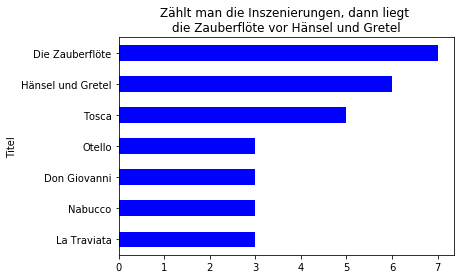

In [14]:
stücke_count.plot(kind='barh', 
                 title='Zählt man die Inszenierungen, dann liegt \ndie Zauberflöte vor Hänsel und Gretel',
                 color='blue',
                  legend=None
                 )

In [15]:
plt.savefig('./img/stücke_count.png')

<Figure size 432x288 with 0 Axes>

Wo überall wurde die Zauberflöte gespielt? 

In [16]:
df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
112,Deutsche Oper am Rhein,Düsseldorf/Duisburg,Otello,5,Giuseppe Verdi,Giuseppe Verdi,Le Roncole,männlich,1813,206,1901,Tot,wiederaufnahmen,(Haus Düsseldorf)


In [17]:
df.groupby('Spielstätte').sum()

,Anzahl,Geburtsjahr,Alter,Sterbedatum
Spielstätte,,,,
Deutsche Oper am Rhein,218,69743,6979,64192
"Musiktheater im Revier, Gelsenkirchen",75,22528,1700,19180
Oper Köln,150,37128,3252,34424
"Oper, Ballett und Junge Oper Dortmund",67,17062,1109,11649
Stadttheater Minden,6,1813,206,1883
Theater Aachen,68,14548,1604,15134
Theater Bielefeld,46,12803,1330,11210
Theater Hagen,74,15975,2196,16599
Theater Herford,4,5540,517,5755


In [18]:
zauberflöte = df[df.Titel == 'Die Zauberflöte']

In [19]:
df.groupby('Spielstätte').sum()

,Anzahl,Geburtsjahr,Alter,Sterbedatum
Spielstätte,,,,
Deutsche Oper am Rhein,218,69743,6979,64192
"Musiktheater im Revier, Gelsenkirchen",75,22528,1700,19180
Oper Köln,150,37128,3252,34424
"Oper, Ballett und Junge Oper Dortmund",67,17062,1109,11649
Stadttheater Minden,6,1813,206,1883
Theater Aachen,68,14548,1604,15134
Theater Bielefeld,46,12803,1330,11210
Theater Hagen,74,15975,2196,16599
Theater Herford,4,5540,517,5755


In [20]:
zauberflöte.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [21]:
zauberflöte = zauberflöte[['Spielstätte', 'Ort', 'Anzahl']]

In [22]:
zauerflöte = zauberflöte.groupby('Ort').sum()

In [23]:
zauberflöte.to_clipboard('./csv/01_zauberfloete.csv', sep=',', encoding='utf-8')

In [24]:
stücke_orte = df[['Ort', 'Titel', 'Anzahl']]

In [25]:
# Wo wurde welches Stück am meisten gespielt? 
stücke_orte.sort_values('Anzahl', ascending=False).head()

,Ort,Titel,Anzahl
39,Düsseldorf/Duisburg,Die Zauberflöte,21
36,Köln,Die Walküre,17
16,Dortmund,Das Land des Lächelns,16
38,Köln,Die Zauberflöte,15
74,Köln,Im weißen Rössel,15


## Anzahl der Aufführungen

In [26]:
stücke_anzahl = pd.pivot_table(stücke, index=['Titel'], aggfunc='sum').sort_values('Anzahl', ascending=False)
stücke_anzahl

,Anzahl
Titel,
Die Zauberflöte,76
Hänsel und Gretel,34
La Traviata,32
Das Land des Lächelns,26
Rusalka,21
Roméo et Juliette,20
La Grande-Duchesse de Géroldstein,19
Die Walküre,19
Nabucco,19


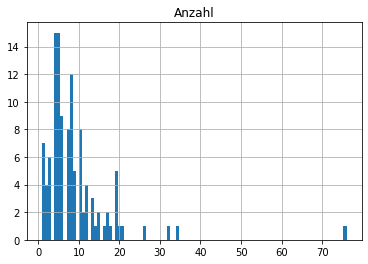

In [27]:
stücke_anzahl.hist(bins=100)

plt.savefig('./img/stuecke_anzahl_histogram.png')

In [28]:
stücke_anzahl.to_csv('./csv/02_stuecke_anzahl.csv')

In [46]:
stuecke_vs_anzahl = df[['Titel', 'Anzahl']]

In [47]:
stuecke_vs_anzahl = stuecke_vs_anzahl.pivot_table(index='Titel',aggfunc=['count', 'sum'])

In [48]:
stuecke_vs_anzahl.sort_values([('sum', 'Anzahl')], ascending=False)

,count,sum
,Anzahl,Anzahl
Titel,,
Die Zauberflöte,7,76
Hänsel und Gretel,6,34
La Traviata,3,32
Das Land des Lächelns,2,26
Rusalka,3,21
Roméo et Juliette,2,20
La Grande-Duchesse de Géroldstein,2,19
Die Walküre,2,19


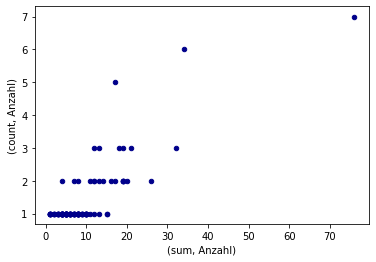

In [49]:
stuecke_vs_anzahl.plot.scatter(x=('sum', 'Anzahl'), y=('count', 'Anzahl'), c='DarkBlue')
plt.savefig('./img/stuecke_vs_anzahl_scatter.png')

In [ ]:
stuecke_vs_anzahl.to_csv('./csv/03_stuecke_vs_anzahl.csv')

### Komponisten

#### Zahl der Komponisten 

In [30]:
composers = df[['Titel', 'Komponist_ber', 'Anzahl']]

In [31]:
len(set(composers.Komponist_ber))

66

In [32]:
composers_alive = df[['Komponist_ber', 'Verstorben']]

In [33]:
composers_alive[composers_alive.Verstorben == 'lebt'].shape

(20, 2)

In [34]:
alive = composers_alive[composers_alive.Verstorben == 'lebt']

In [35]:
alive.to_clipboard()

In [36]:
composers_alive = composers_alive.drop_duplicates()

In [37]:
composers_alive = composers_alive.groupby('Verstorben').count()
composers_alive

,Komponist_ber
Verstorben,
Tot,48
lebt,18


In [38]:
composers_alive.Komponist_ber.sum()

66

In [39]:
composers_alive['%']= composers_alive.Komponist_ber.apply(lambda x: round(x / composers_alive.Komponist_ber.sum() * 100))

In [40]:
composers_alive

,Komponist_ber,%
Verstorben,,
Tot,48,73.0
lebt,18,27.0


#### Lebensdaten der Komponisten

Die Grafik zeigt die Lebensdaten der 66 Komponist*innen auf einen Blick. 

In [117]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung', 'Zauberflöte'],
      dtype='object')

In [118]:
lebensdaten = df[['Komponist_ber', 'Geburtsjahr', 'Sterbedatum']]

In [119]:
lebensdaten = lebensdaten.drop_duplicates()

In [120]:
lebensdaten.Sterbedatum = lebensdaten.Sterbedatum.apply(lambda x: 2019 if x== 0 else x)

In [121]:
lebensdaten = lebensdaten[lebensdaten.Geburtsjahr > 0]

In [122]:
lebensdaten.rename(columns={'Sterbedatum': 'Sterbejahr'}, inplace=True)

In [123]:
lebensdaten = lebensdaten.sort_values('Geburtsjahr')

In [124]:
lebensdaten["type"] = "range"

In [125]:
lebensdaten.sample()

,Komponist_ber,Geburtsjahr,Sterbejahr,type
3,Johann Christian Bach,1735,1782,range


In [127]:
lebensdaten.to_json('lebensdaten.json', orient='records')

#### Meistegspielte Komponisten

In [41]:
composers_count = pd.pivot_table(composers, index=['Komponist_ber'], aggfunc='count').sort_values(by='Anzahl', ascending=False)

In [42]:
composers_count.head(10)

,Anzahl,Titel
Komponist_ber,,
Giuseppe Verdi,22,22
Wolfgang Amadeus Mozart,15,15
Richard Wagner,12,12
Giacomo Puccini,9,9
Jacques Offenbach,7,7
Engelbert Humperdinck,7,7
Richard Strauss,5,5
Franz Lehár,4,4
Leonard Bernstein,3,3


In [58]:
len(set(df[df.Komponist_ber == 'Giuseppe Verdi'].Titel))

13

In [59]:
set(df[df.Komponist_ber == 'Giuseppe Verdi'].Titel)

{'Aida',
 'Die sizilianische Vesper',
 'Don Carlo',
 'Falstaff',
 'Jérusalem',
 'La Traviata',
 'La forza del destino',
 'Luisa Miller',
 'Nabucco',
 'Otello',
 'Rigoletto',
 'Simon Boccanegra',
 'Viva Verdi'}

#### Meistgespielte anhand Anzahl der Aufführungen

In [60]:
composers_count = pd.pivot_table(composers, index=['Komponist_ber'], aggfunc='sum').sort_values(by='Anzahl', ascending=False)

In [61]:
composers_count.head(10)

,Anzahl
Komponist_ber,
Giuseppe Verdi,143
Wolfgang Amadeus Mozart,118
Richard Wagner,68
Jacques Offenbach,59
Giacomo Puccini,43
Engelbert Humperdinck,42
Leonard Bernstein,32
Richard Strauss,30
Franz Lehár,29


In [63]:
composers_count.tail()

,Anzahl
Komponist_ber,
Frank Engel,1
Dirk Heidicke,1
Fons Merkies,1
Wilfried Hiller,1
Friedrich von Flotow,1


#### Alter der Komponisten

In [53]:
composers_age = df[['Komponist_ber', 'Alter']]
composer_age = composers_age[composers_age.Alter.notnull()]
composers_age.Alter.median()

181.0

In [54]:
composers_age.Alter.mean()

175.0817610062893

In [55]:
composers_age.Alter.mode()

0    206
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0213d3d208>]],
      dtype=object)

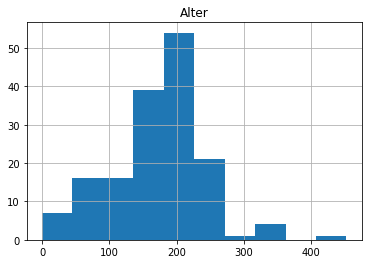

In [56]:
composers_age.hist()

In [57]:
composers_age.Alter.max()

452

In [58]:
composers_age = composers_age.sort_values(by='Alter', ascending=False)

In [59]:
composers_age = composers_age.drop_duplicates()

In [60]:
composers_age.head()

,Komponist_ber,Alter
11,Claudio Monteverdi,452
152,Henry Purcell,360
158,Georg Friedrich Händel,334
3,Johann Christian Bach,284
88,Antonio Salieri,269


In [61]:
composers_age.tail()

,Komponist_ber,Alter
134,Anno Schreier,40
150,Moritz Anthes,39
79,Nuñez Hierro,39
58,Leonard Evers,34
114,Dirk Heidicke,0


#### Alter vs Anzahl der Aufführungen 

In [62]:
age_vs_anzahl = df[['Komponist_ber', 'Alter', 'Anzahl', 'Verstorben']]

In [63]:
age_vs_anzahl = age_vs_anzahl.pivot_table(values=['Anzahl', 'Alter', 'Verstorben'], index='Komponist_ber', aggfunc={'Anzahl': 'sum', 'Alter': 'min', 'Verstorben': 'min'})

In [64]:
age_vs_anzahl.sort_values(by='Anzahl', ascending=False).head()

,Alter,Anzahl,Verstorben
Komponist_ber,,,
Giuseppe Verdi,206,143,Tot
Wolfgang Amadeus Mozart,263,118,Tot
Richard Wagner,206,68,Tot
Jacques Offenbach,200,59,Tot
Giacomo Puccini,161,43,Tot


In [65]:
age_vs_anzahl.to_clipboard()

In [187]:
age_vs_anzahl.Verstorben = age_vs_anzahl.Verstorben.apply(lambda x: 1 if x == 'Tot' else 0)

In [189]:
age_vs_anzahl.sample()

,Alter,Anzahl,Verstorben
Komponist_ber,,,
Jake Heggie,58,6,0


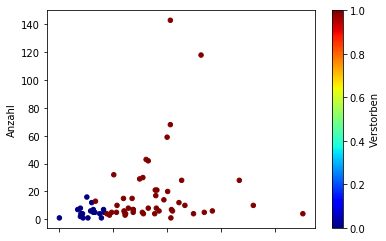

In [192]:
age_vs_anzahl.plot.scatter(x='Alter', y='Anzahl', c='Verstorben', colormap='jet')
plt.savefig('./img/age_vs_anzahl_scatter.png')

In [195]:
age_vs_anzahl.to_csv('./csv/age_vs_anzahl.csv')

### Häuser 

In [196]:
df.Ort.value_counts()

Düsseldorf/Duisburg        38
Köln                       20
Essen                      16
Bonn                       13
Krefeld/Mönchengladbach    12
Gelsenkirchen              12
Wuppertal                  10
Dortmund                    9
Hagen                       9
Aachen                      8
Bielefeld                   7
Herford                     4
Minden                      1
Name: Ort, dtype: int64

<bound method DataFrame.pivot of           Geburtsort  Sterbedatum Geschlecht  \
0                NaN            0   männlich   
1                NaN            0   männlich   
2                NaN            0   männlich   
3            Cremona            0   männlich   
4        Westminster         1695   männlich   
5      Halle (Saale)         1759   männlich   
6      Halle (Saale)         1759   männlich   
7      Halle (Saale)         1759   männlich   
8            Leipzig         1782   männlich   
9            Legnago         1825   männlich   
10          Salzburg         1791   männlich   
11          Salzburg         1791   männlich   
12          Salzburg         1791   männlich   
13          Salzburg         1791   männlich   
14          Salzburg         1791   männlich   
15          Salzburg         1791   männlich   
16          Salzburg         1791   männlich   
17          Salzburg         1791   männlich   
18          Salzburg         1791   männlich   
19     

In [44]:
df.groupby('Komponist_ber').count().sort_values(by='Spielstätte', ascending=False).head(10)

,Geburtsort,Sterbedatum,Geschlecht,Spielstätte,Veranstalter,Ort,Art,Titel,Anzahl,Geburtsjahr,Alter,Verstorben,Oper,Bemerkung
Komponist_ber,,,,,,,,,,,,,,
Giuseppe Verdi,22,22,22,22,22,22,22,22,22,22,22,22,22,0
Wolfgang Amadeus Mozart,15,15,15,15,15,15,15,15,15,15,15,15,15,1
Richard Wagner,11,11,11,11,11,11,11,11,11,11,11,11,11,0
Giacomo Puccini,8,9,8,9,9,9,9,9,9,9,9,9,9,1
Engelbert Humperdinck,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Jacques Offenbach,6,7,6,7,7,7,7,7,7,7,7,7,7,1
Richard Strauss,5,5,5,5,5,5,5,5,5,5,5,5,5,0
Franz Lehár,4,4,4,4,4,4,4,4,4,4,4,4,4,1
Carl Maria von Weber,4,4,4,4,4,4,4,4,4,4,4,4,4,0


In [353]:
 df[df.Geschlecht == 'weiblich']

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
117,Wuppertaler Bühnen,Wuppertal,Kleines Stück Himmel,8,NaN,Nuñez Hierro,Cádiz,weiblich,1980,39,0,lebt,premieren,NaN


In [363]:
geburtsorte = df[['Komponist_ber', 'Geburtsort']]

In [366]:
geburtsorte = geburtsorte.drop_duplicates()

In [367]:
geburtsorte.to_csv('geburtsorte.csv')

### Spielstätten

In [222]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [227]:
df.groupby('Spielstätte').sum().sort_values(by='Anzahl', ascending= False)

,Anzahl,Geburtsjahr,Alter,Sterbedatum
Spielstätte,,,,
Deutsche Oper am Rhein,218,69743,6979,64192
Oper Köln,150,37128,3252,34424
Theater/Oper/Schauspiel Bonn,105,23867,2380,20654
Theater Krefeld Mönchengladbach,82,22228,2000,18987
"Musiktheater im Revier, Gelsenkirchen",75,22528,1700,19180
Theater Hagen,74,15975,2196,16599
Theater und Philharmoie Essen,74,29180,3124,28181
Theater Aachen,68,14548,1604,15134
"Oper, Ballett und Junge Oper Dortmund",67,17062,1109,11649


69187.20497623291